In [1]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Learn how to read a .xls file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_excel('Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [0]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('Indian Coordinates.xlsx')

#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

## 1.2 Analysing COVID19 Cases in India

In [4]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
#Total case is the total number of confirmed cases (Indian National + Foreign National)

df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)


Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 562


In [5]:
#Learn how to highlight your dataframe
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


In [6]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


## 1.4 Visualising the spread geographically

In [7]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## 1.5 Confirmed vs Recovered figures

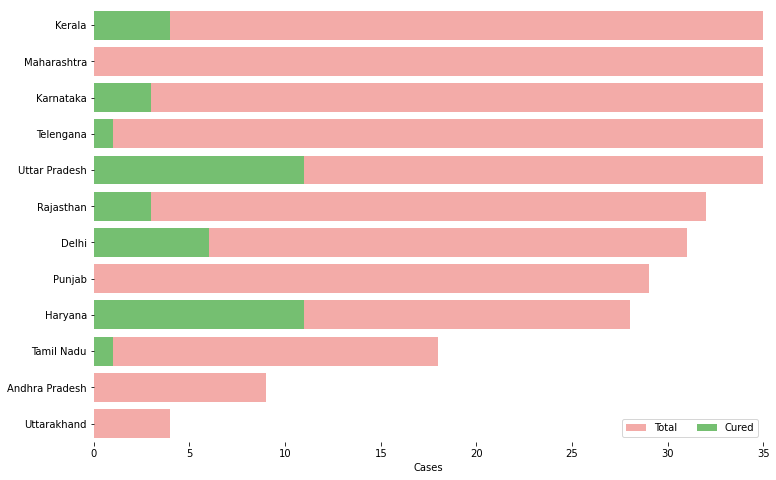

In [8]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## 1.6 How the Coronavirus cases are rising?

In [0]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [10]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

# Part 2: Is the trend similar to Italy/ S.Korea/ Wuhan?


## 2.1 Cumulative cases in India, Italy, S.Korea, and Wuhan

In [11]:
# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

## 2.2 Comparison between the rise of cases in Wuhan, S.Korea, Italy and India

In [12]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

## 2.3 Trend after crossing 100 cases

In [13]:
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

#Part 3:  Exploring World wide data


In [0]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global (1).csv")
df_recovered = pd.read_csv("/content/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("/content/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [15]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [16]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [17]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0,0,0
1,2020-01-22,Australia,New South Wales,0,0,0
2,2020-01-22,Australia,Northern Territory,0,0,0
3,2020-01-22,Australia,Queensland,0,0,0
4,2020-01-22,Australia,South Australia,0,0,0


In [18]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
90,2020-04-21,20080,645,3975
91,2020-04-22,21370,681,4370
92,2020-04-23,23077,721,5012
93,2020-04-24,24530,780,5498


In [19]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,5615.595617,5920.673761,555,17,28
2020-01-23,5615.595617,5920.673761,654,18,30
2020-01-24,5615.595617,5920.673761,941,26,35
2020-01-25,5615.595617,5920.673761,1434,42,38
2020-01-26,5615.595617,5920.673761,2118,56,51


## 3.1 Visualizing: Worldwide NCOVID-19 cases  

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [21]:
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
90,2020-04-21,2548086
91,2020-04-22,2623044
92,2020-04-23,2707723
93,2020-04-24,2809494


In [22]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

#Part 4: Forecasting Total Number of Cases Worldwide


## **Data Manipulation**

In [0]:
worldwide_confirmed=pd.read_csv('time_series_covid19_confirmed_global (1).csv')
worldwide_death=pd.read_csv('time_series_covid_19_deaths.csv')
worldwide_recovered=pd.read_csv('time_series_covid_19_recovered.csv')

In [0]:
worldwide_confirmed=worldwide_confirmed.drop(['Province/State','Lat','Long','Country/Region'],axis=1)
worldwide_death=worldwide_death.drop(['Province/State','Lat','Long','Country/Region'],axis=1)
worldwide_recovered=worldwide_recovered.drop(['Province/State','Lat','Long','Country/Region'],axis=1)

In [0]:
worldwide_confirmed=worldwide_confirmed.sum(axis=0).reset_index()
worldwide_death=worldwide_death.sum(axis=0).reset_index()
worldwide_recovered=worldwide_recovered.sum(axis=0).reset_index()

In [0]:
worldwide_confirmed.columns=['ds','y']
worldwide_death.columns=['ds','y']
worldwide_recovered.columns=['ds','y']

In [27]:
worldwide_recovered.tail()

,ds,y
85,4/16/20,542107
86,4/17/20,568343
87,4/18/20,592319
88,4/19/20,623903
89,4/20/20,645738


In [0]:
worldwide_confirmed['ds'] = pd.to_datetime(worldwide_confirmed['ds'])
worldwide_death['ds'] = pd.to_datetime(worldwide_death['ds'])
worldwide_recovered['ds'] = pd.to_datetime(worldwide_recovered['ds'])

In [0]:
from fbprophet import Prophet

## **Danish Data**

In [0]:
#world=pd.read_csv('covid_19_clean_complete.csv')
#world.tail()

In [0]:
#world=world.drop(['Province/State','Lat','Long','Country/Region'],axis=1)

In [0]:
#worldwide_confirmed=world.groupby('Date').sum()['Confirmed'].reset_index()
#worldwide_death=world.groupby('Date').sum()['Deaths'].reset_index()
#worldwide_recovered=world.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
#worldwide_confirmed.columns=['ds','y']
#worldwide_death.columns=['ds','y']
#worldwide_recovered.columns=['ds','y']

In [0]:
#worldwide_confirmed['ds'] = pd.to_datetime(worldwide_confirmed['ds'])
#worldwide_death['ds'] = pd.to_datetime(worldwide_death['ds'])
#worldwide_recovered['ds'] = pd.to_datetime(worldwide_recovered['ds'])


##4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [138]:
confirm_model_prophet = Prophet(interval_width=0.95)
confirm_model_prophet.stan_backend.logger = None
confirm_model_prophet.fit(worldwide_confirmed)
future = confirm_model_prophet.make_future_dataframe(periods=0)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22


In [139]:
#predicting the future with date, and upper and lower limit of y value
forecast = confirm_model_prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2020-04-18,2.312985e+06,2.304331e+06,2.320910e+06
88,2020-04-19,2.394264e+06,2.386510e+06,2.402291e+06
89,2020-04-20,2.471940e+06,2.464360e+06,2.479963e+06
90,2020-04-21,2.551970e+06,2.544138e+06,2.559991e+06
91,2020-04-22,2.633083e+06,2.625151e+06,2.640736e+06


In [140]:
forecast['yhat'].iloc[-1]
forecast['yhat_lower'].iloc[-1]
forecast['yhat_upper'].iloc[-1]

2640735.899319231

In [141]:
model_scores=[]
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
model_scores.append(np.sqrt(mean_squared_error(worldwide_confirmed['y'],forecast['yhat'].head(worldwide_confirmed.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(worldwide_confirmed["y"],forecast['yhat'].head(worldwide_confirmed.shape[0]))))

Root Mean Squared Error for Prophet Model:  4066.34907539752


In [142]:
r2_score(worldwide_confirmed.y,forecast.yhat)

0.9999712360171975

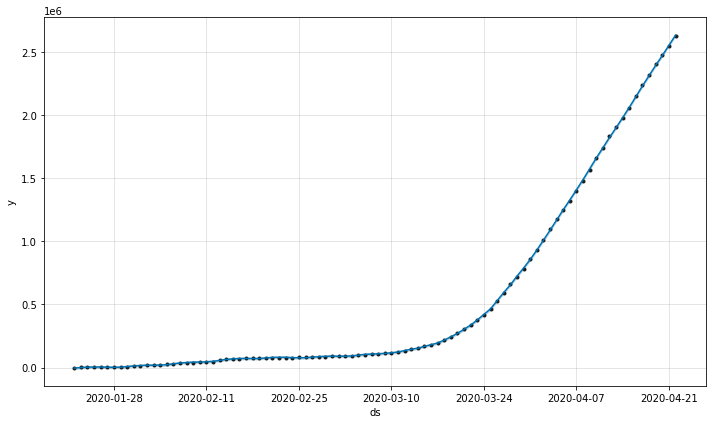

In [143]:
confirmed_forecast_plot = confirm_model_prophet.plot(forecast)

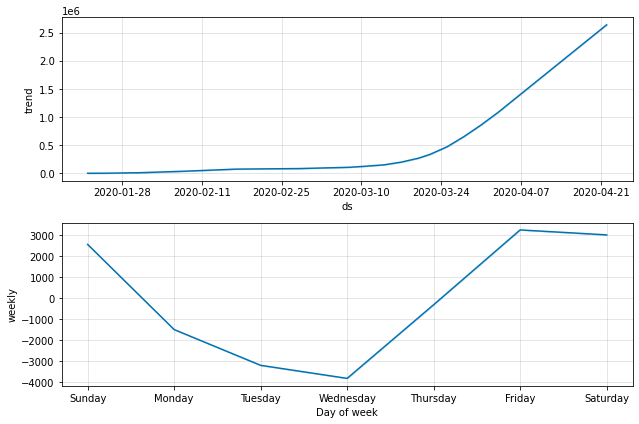

In [144]:
confirmed_forecast_plot =confirm_model_prophet.plot_components(forecast)

In [145]:
worldwide_confirmed['Days Since']=worldwide_confirmed.index-confirmed.index[0]
worldwide_confirmed

,ds,y,Days Since
0,2020-01-22,555,0
1,2020-01-23,654,1
2,2020-01-24,941,2
3,2020-01-25,1434,3
4,2020-01-26,2118,4
...,...,...,...
87,2020-04-18,2317758,87
88,2020-04-19,2401101,88
89,2020-04-20,2472258,89
90,2020-04-21,2549293,90


In [146]:
worldwide_confirmed.describe()

,y,Days Since
count,9.200000e+01,92.00000
mean,5.408188e+05,45.50000
std,7.623482e+05,26.70206
min,5.550000e+02,0.00000
25%,6.525575e+04,22.75000
50%,1.078340e+05,45.50000
75%,8.011635e+05,68.25000
max,2.623413e+06,91.00000


### **Linear Regression Confirmed**

In [147]:
worldwide_confirmed

,ds,y,Days Since
0,2020-01-22,555,0
1,2020-01-23,654,1
2,2020-01-24,941,2
3,2020-01-25,1434,3
4,2020-01-26,2118,4
...,...,...,...
87,2020-04-18,2317758,87
88,2020-04-19,2401101,88
89,2020-04-20,2472258,89
90,2020-04-21,2549293,90


In [0]:
worldwide_confirmed.columns=['ds','y','Days Since']
worldwide_confirmed['ds']=pd.to_datetime(worldwide_confirmed['ds'])
x=worldwide_confirmed['Days Since']
y=worldwide_confirmed['y']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(worldwide_confirmed['Days Since'],worldwide_confirmed['y'],test_size=0.3)

In [150]:
X_train.shape

(64,)

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(normalize=True)

In [152]:
lin_reg.fit(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [153]:
X_test

32    32
49    49
22    22
66    66
21    21
37    37
18    18
44    44
41    41
52    52
73    73
58    58
31    31
23    23
90    90
74    74
50    50
43    43
40    40
5      5
36    36
38    38
62    62
64    64
26    26
16    16
60    60
91    91
Name: Days Since, dtype: int64

In [0]:
prediction_valid_linreg=lin_reg.predict(np.array(X_test).reshape(-1,1))

In [155]:
prediction_valid_linreg

array([[ 281167.31956099],
       [ 677413.42152177],
       [  48081.37723112],
       [1073659.52348255],
       [  24772.78299813],
       [ 397710.29072593],
       [ -45152.99970083],
       [ 560870.45035683],
       [ 490944.66765787],
       [ 747339.20422073],
       [1236819.68311346],
       [ 887190.76961865],
       [ 257858.725328  ],
       [  71389.97146411],
       [1633065.78507424],
       [1260128.27734645],
       [ 700722.01575476],
       [ 537561.85612385],
       [ 467636.07342489],
       [-348164.72472966],
       [ 374401.69649294],
       [ 421018.88495891],
       [ 980425.1465506 ],
       [1027042.33501658],
       [ 141315.75416307],
       [ -91770.1881668 ],
       [ 933807.95808463],
       [1656374.37930723]])

In [156]:
Y_test

32      78958
49     125875
22      60368
66     660693
21      45221
37      84112
18      40150
44     101801
41      92840
52     156101
73    1175857
58     272208
31      78572
23      66885
90    2549293
74    1249484
50     128352
43      97886
40      90306
5        2927
36      82746
38      86011
62     418041
64     529591
26      73258
16      34391
60     336953
91    2623413
Name: y, dtype: int64

In [157]:
model_scores.append(np.sqrt(mean_squared_error(Y_test,prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(Y_test,prediction_valid_linreg)))


Root Mean Square Error for Linear Regression:  441338.0451497307


In [158]:
lin_reg.score(np.array(X_test).reshape(-1,1),np.array(Y_test).reshape(-1,1))

0.5790286998797186

### **SVR Confirmed**

In [0]:
from sklearn.svm import SVR
svr=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)

In [160]:
svr.fit(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_valid_svr=svr.predict(np.array(X_test).reshape(-1,1))

In [162]:
model_scores.append(np.sqrt(mean_squared_error(Y_test,prediction_valid_svr)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(Y_test,prediction_valid_svr)))

Root Mean Square Error for Support Vectore Machine:  392539.7282086744


In [163]:
svr.score(np.array(X_test).reshape(-1,1),np.array(Y_test).reshape(-1,1))

0.6669748830642381

### **ARIMA Confirmed**

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

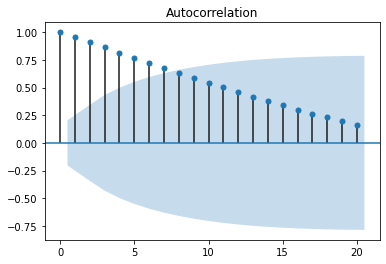

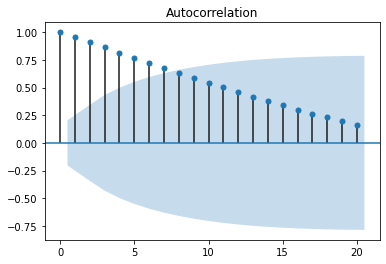

In [165]:
# plot acf to identify parameter q
#ARIMA(p,d,q)
plot_acf(worldwide_confirmed['y'])

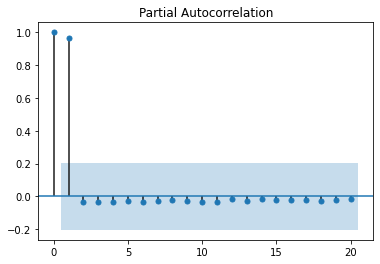

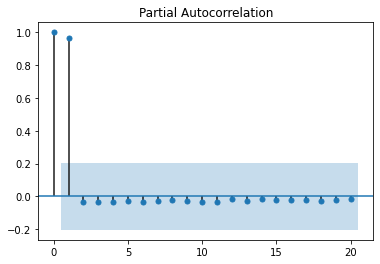

In [166]:
#plot acf to identify parameter p
plot_pacf(worldwide_confirmed['y'])

In [0]:
#p=1,2
#d=1,2
#q=0

In [0]:
model_train=worldwide_confirmed.iloc[:int(worldwide_confirmed.shape[0]*0.90)]
valid=worldwide_confirmed.iloc[int(worldwide_confirmed.shape[0]*0.90):]
y_pred=valid.copy()
from statsmodels.tsa.arima_model import ARIMA
log_series=np.log(model_train["y"])
model_ar=ARIMA(log_series,(1,2,0))
model_ar_fit=model_ar.fit()

In [0]:
prediction_ar=model_ar_fit.forecast(len(valid))[0]
y_pred["ARIMA Model Prediction"]=list(np.exp(prediction_ar))

In [170]:
model_scores.append(np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_ar))))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_ar))))

Root Mean Square Error for ARIMA Model:  48318.25308942223


### **AR Confirmed**

In [0]:
from statsmodels.tsa.arima_model import ARMA
model_train=worldwide_confirmed.iloc[:int(worldwide_confirmed.shape[0]*0.95)]
valid=worldwide_confirmed.iloc[int(worldwide_confirmed.shape[0]*0.95):]
y_pred=valid.copy()

In [0]:
model_ar=ARMA(log_series,(1,1,0))
model_ar_fit=model_ar.fit()

In [0]:
prediction_ar=model_ar_fit.forecast(len(valid))[0]
y_pred["AR Model Prediction"]=list(np.exp(prediction_ar))

In [174]:
model_scores.append(np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_ar))))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_ar))))

Root Mean Square Error for AR Model:  628317.9824276881


### **Confirmed Model Comparison**

In [175]:
model_names=['Facebook prophet model','Linear Regression','SVR','ARIMA','AR']
Confirmed_rms=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
Confirmed_rms

,Model Name,Root Mean Squared Error
0,Facebook prophet model,4066.349075
3,ARIMA,48318.253089
2,SVR,392539.728209
1,Linear Regression,441338.045150
4,AR,628317.982428


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

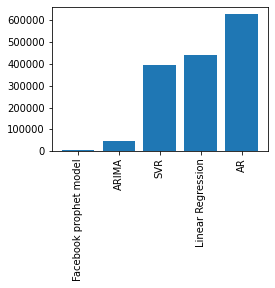

In [176]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
plt.bar(x=Confirmed_rms['Model Name'],height=Confirmed_rms['Root Mean Squared Error'],width=0.8)
plt.xticks(rotation=90)

##4.2 Forecasting Worldwide Deaths using Prophet (Base model)

Generating a week ahead forecast of deaths cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
from datetime import timedelta, date
dates=[]
date1=date(2019,4,2)
date2=date(2019,4,22)
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)
for dt in daterange(date1, date2):
  dates.append(dt.strftime("%Y-%m-%d"))

In [180]:
death_model_prophet = Prophet(interval_width=0.95)
death_model_prophet.stan_backend.logger = None
death_model_prophet.fit(worldwide_death[['ds','y']])
future = death_model_prophet.make_future_dataframe(periods=0)
#future=pd.DataFrame(data=dates,columns=['ds'])
future.tail()
death_rms=[]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [181]:
forecast = death_model_prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
85,2020-04-16,143147.299618,141266.738386,145089.417572
86,2020-04-17,150081.822303,148199.206299,152028.734345
87,2020-04-18,156474.904442,154557.203109,158453.717809
88,2020-04-19,162743.639135,160835.565375,164735.271318
89,2020-04-20,168976.786620,167086.594261,170730.200467


In [182]:
death_rms.append(np.sqrt(mean_squared_error(worldwide_death["y"],forecast['yhat'].head(worldwide_death.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(worldwide_death["y"],forecast['yhat'].head(worldwide_death.shape[0]))))

Root Mean Squared Error for Prophet Model:  992.2460295264783


In [183]:
r2_score(worldwide_death.y, forecast.yhat)

0.9995380415697582

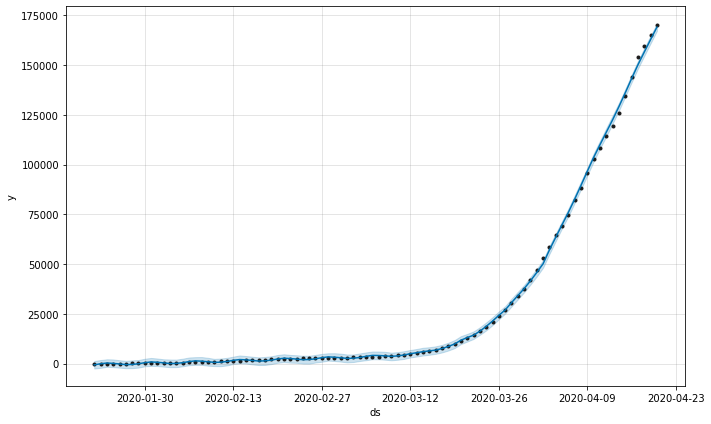

In [184]:
deaths_forecast_plot = death_model_prophet.plot(forecast)

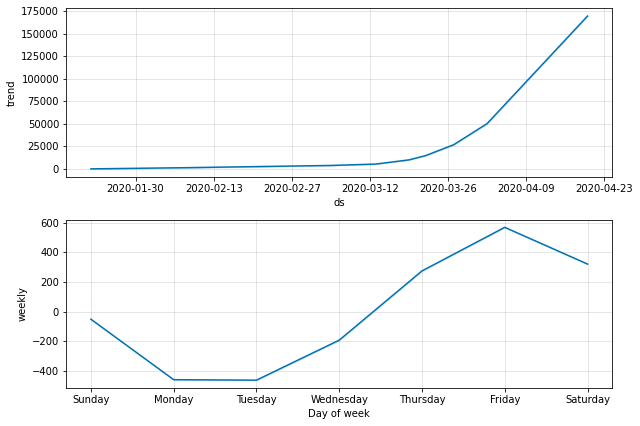

In [185]:
deaths_forecast_plot = death_model_prophet.plot_components(forecast)

### **Linear Regression Death**

In [186]:
worldwide_death['Days Since death']=worldwide_death.index-confirmed.index[0]
worldwide_death

,ds,y,Days Since death
0,2020-01-22,17,0
1,2020-01-23,18,1
2,2020-01-24,26,2
3,2020-01-25,42,3
4,2020-01-26,56,4
...,...,...,...
85,2020-04-16,143800,85
86,2020-04-17,153821,86
87,2020-04-18,159509,87
88,2020-04-19,165043,88


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(worldwide_death['Days Since death'],worldwide_death['y'],test_size=0.3) 

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(normalize=True)

In [0]:
model_fit=lin_reg.fit(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))

In [0]:
model_predict=lin_reg.predict(np.array(X_test).reshape(-1,1))

In [192]:
death_rms.append(np.sqrt(mean_squared_error(Y_test,model_predict)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(Y_test,model_predict)))

Root Mean Square Error for Linear Regression:  38043.43633579705


### **ARIMA Death**

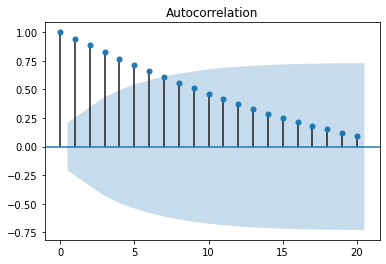

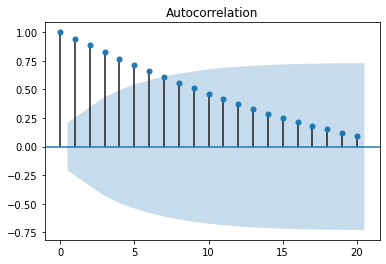

In [193]:
# plot acf to identify parameter q
#ARIMA(p,d,q)
plot_acf(worldwide_death['y'])

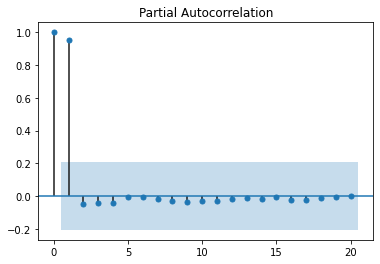

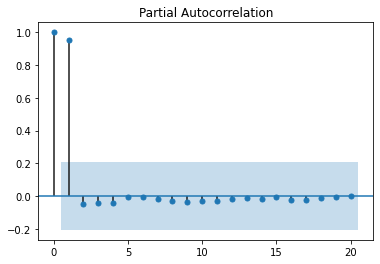

In [194]:
#plot acf to identify parameter p
plot_pacf(worldwide_death['y'])

In [195]:
model_train=worldwide_death.iloc[:int(worldwide_death.shape[0]*0.90)]
valid=worldwide_death.iloc[int(worldwide_death.shape[0]*0.90):]
y_pred=valid.copy()
model_train

,ds,y,Days Since death
0,2020-01-22,17,0
1,2020-01-23,18,1
2,2020-01-24,26,2
3,2020-01-25,42,3
4,2020-01-26,56,4
...,...,...,...
76,2020-04-07,81937,76
77,2020-04-08,88338,77
78,2020-04-09,95521,78
79,2020-04-10,102525,79


In [0]:
from statsmodels.tsa.arima_model import ARIMA
log_series=np.log(model_train["y"])
model_ar=ARIMA(log_series,(1,2,0))
model_ar_fit=model_ar.fit()

In [0]:
prediction_arima=model_ar_fit.forecast(len(valid))[0]
y_pred["ARIMA Model Prediction"]=list(np.exp(prediction_arima))

In [198]:
y_pred

,ds,y,Days Since death,ARIMA Model Prediction
81,2020-04-12,114090,81,115412.564349
82,2020-04-13,119481,82,122225.859989
83,2020-04-14,125983,83,129478.673387
84,2020-04-15,134176,84,136885.063146
85,2020-04-16,143800,85,144587.741171
86,2020-04-17,153821,86,152503.614782
87,2020-04-18,159509,87,160665.521102
88,2020-04-19,165043,88,169043.923439
89,2020-04-20,169985,89,177639.757666


In [199]:
death_rms.append(np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_arima))))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_arima))))

Root Mean Square Error for ARIMA Model:  3450.2571995131707


### **SVR Death**

In [200]:
svr2=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)
svr2.fit(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_valid_svr2=svr2.predict(np.array(X_test).reshape(-1,1))

In [202]:
death_rms.append(np.sqrt(mean_squared_error(Y_test,prediction_valid_svr2)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(Y_test,prediction_valid_svr2)))

Root Mean Square Error for Support Vectore Machine:  5121.527887871885


In [203]:
svr2.score(np.array(X_test).reshape(-1,1),np.array(Y_test).reshape(-1,1))

0.992091180694977

### **AR Death**

In [0]:
from statsmodels.tsa.arima_model import ARMA
model_train=worldwide_death.iloc[:int(worldwide_death.shape[0]*0.95)]
valid=worldwide_death.iloc[int(worldwide_death.shape[0]*0.95):]
y_pred=valid.copy()

In [0]:
model_ar=ARMA(log_series,(1,0,0))
model_ar_fit=model_ar.fit()

In [0]:
prediction_ar=model_ar_fit.forecast(len(valid))[0]
y_pred["AR Model Prediction"]=list(np.exp(prediction_ar))

In [207]:
death_rms.append(np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_ar))))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_ar))))

Root Mean Square Error for AR Model:  51603.877119325145


### **Death Model Comaparison**

In [208]:
model_names2=['Facebook prophet model','Linear Regression','ARIMA','SVR','AR']
Death_rms=pd.DataFrame(zip(model_names2,death_rms),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
Death_rms

,Model Name,Root Mean Squared Error
0,Facebook prophet model,992.246030
2,ARIMA,3450.257200
3,SVR,5121.527888
1,Linear Regression,38043.436336
4,AR,51603.877119


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

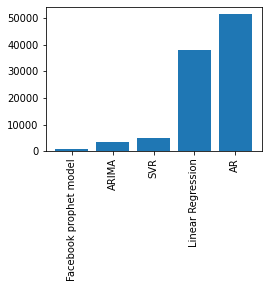

In [209]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
plt.bar(x=Death_rms['Model Name'],height=Death_rms['Root Mean Squared Error'],width=0.8)
plt.xticks(rotation=90)

##4.2 Forecasting Worldwide Recovered using Prophet (Base model)

Generating a week ahead forecast of recovered cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [210]:
recovered_model_prophet = Prophet(interval_width=0.95)
recovered_model_prophet.stan_backend.logger = None
recovered_model_prophet.fit(worldwide_recovered[['ds','y']])
future = recovered_model_prophet.make_future_dataframe(periods=0)
#future=pd.DataFrame(data=dates,columns=['ds'])
future.tail()
recovered_rms=[]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [211]:
forecast = recovered_model_prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
85,2020-04-16,536010.753882,525827.544410,546898.435404
86,2020-04-17,559670.199549,548543.377190,570674.762898
87,2020-04-18,584034.341204,573173.604926,594857.425998
88,2020-04-19,608010.878347,597586.511376,617694.567808
89,2020-04-20,631981.861744,621579.690202,642596.930679


In [212]:
recovered_rms.append(np.sqrt(mean_squared_error(worldwide_recovered["y"],forecast['yhat'].head(worldwide_recovered.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(worldwide_recovered["y"],forecast['yhat'].head(worldwide_recovered.shape[0]))))

Root Mean Squared Error for Prophet Model:  5412.697066030274


In [213]:
r2_score(worldwide_recovered.y, forecast.yhat)

0.9989537376142719

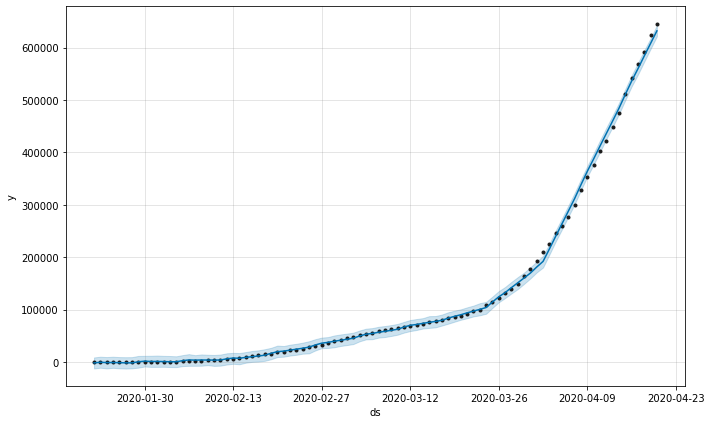

In [214]:
recovered_forecast_plot = recovered_model_prophet.plot(forecast)

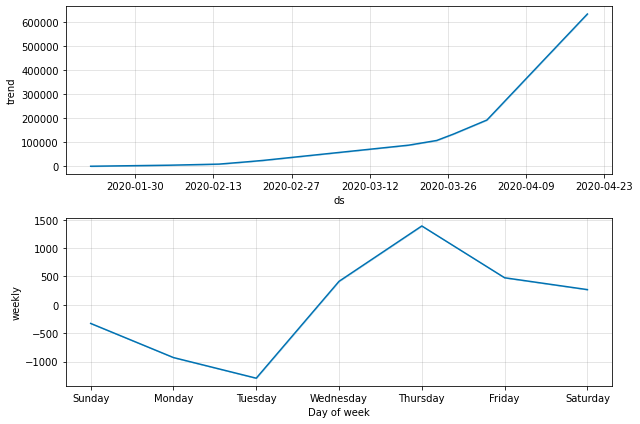

In [215]:
deaths_forecast_plot = recovered_model_prophet.plot_components(forecast)

### **Linear Regression Recovered**

In [216]:
worldwide_recovered['Days Since death']=worldwide_recovered.index-confirmed.index[0]
worldwide_recovered

,ds,y,Days Since death
0,2020-01-22,28,0
1,2020-01-23,30,1
2,2020-01-24,36,2
3,2020-01-25,39,3
4,2020-01-26,52,4
...,...,...,...
85,2020-04-16,542107,85
86,2020-04-17,568343,86
87,2020-04-18,592319,87
88,2020-04-19,623903,88


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(worldwide_recovered['Days Since death'],worldwide_recovered['y'],test_size=0.3)

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(normalize=True)

In [0]:
model_fit=lin_reg.fit(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))

In [0]:
model_predict=lin_reg.predict(np.array(X_test).reshape(-1,1))

In [222]:
recovered_rms.append(np.sqrt(mean_squared_error(Y_test,model_predict)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(Y_test,model_predict)))

Root Mean Square Error for Linear Regression:  86889.01881471426


### **ARIMA Recovered**

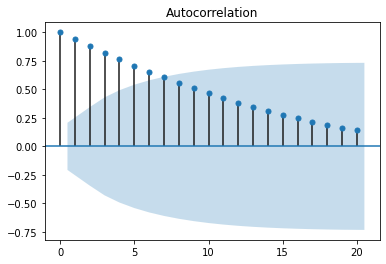

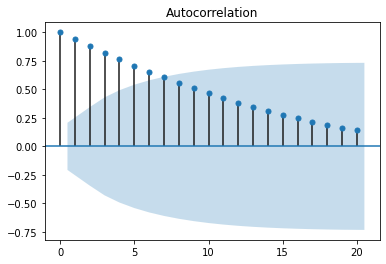

In [223]:
# plot acf to identify parameter q
#ARIMA(p,d,q)
plot_acf(worldwide_recovered['y'])

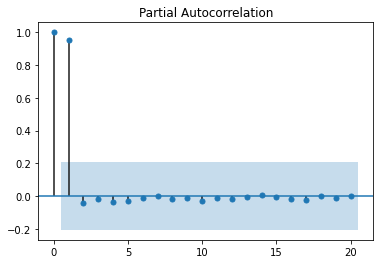

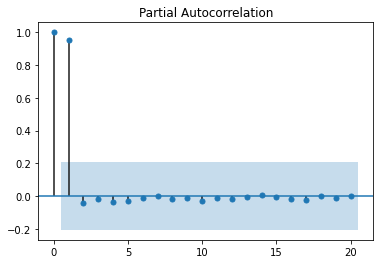

In [224]:
#plot acf to identify parameter p
plot_pacf(worldwide_recovered['y'])

In [0]:
model_train=worldwide_recovered.iloc[:int(worldwide_recovered.shape[0]*0.95)]
valid=worldwide_recovered.iloc[int(worldwide_recovered.shape[0]*0.95):]
log_series=np.log(model_train["y"])
y_pred=valid.copy()

In [0]:
model_arima=ARIMA(log_series,(1,2,1))
model_arima_fit=model_arima.fit()

In [0]:
prediction_arima=model_arima_fit.forecast(len(valid))[0]
y_pred["ARIMA Model Prediction"]=list(np.exp(prediction_arima))

In [228]:
recovered_rms.append(np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_arima))))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_arima))))

Root Mean Square Error for ARIMA Model:  22039.833955982784


### **SVR Recovered**

In [229]:
svr2=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)
svr2.fit(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_valid_svr2=svr2.predict(np.array(X_test).reshape(-1,1))

In [231]:
recovered_rms.append(np.sqrt(mean_squared_error(Y_test,prediction_valid_svr2)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(Y_test,prediction_valid_svr2)))

Root Mean Square Error for Support Vectore Machine:  13691.02913681283


In [232]:
svr2.score(np.array(X_test).reshape(-1,1),np.array(Y_test).reshape(-1,1))

0.9928588544461245

### **AR Recovered**

In [0]:
from statsmodels.tsa.arima_model import ARMA
model_train=worldwide_recovered.iloc[:int(worldwide_recovered.shape[0]*0.95)]
valid=worldwide_recovered.iloc[int(worldwide_recovered.shape[0]*0.95):]
y_pred=valid.copy()

In [0]:
model_ar=ARMA(log_series,(1,2,0))
model_ar_fit=model_ar.fit()

In [0]:
prediction_ar=model_ar_fit.forecast(len(valid))[0]
y_pred["AR Model Prediction"]=list(np.exp(prediction_ar))

In [236]:
recovered_rms.append(np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_ar))))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(list(valid["y"]),np.exp(prediction_ar))))

Root Mean Square Error for AR Model:  67665.0649851115


### **Recovered Model Comparison**

In [237]:
model_names3=['Facebook prophet model','Linear Regression','ARIMA','SVR','AR']
Recovered_rms=pd.DataFrame(zip(model_names3,recovered_rms),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
Recovered_rms

,Model Name,Root Mean Squared Error
0,Facebook prophet model,5412.697066
3,SVR,13691.029137
2,ARIMA,22039.833956
4,AR,67665.064985
1,Linear Regression,86889.018815


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

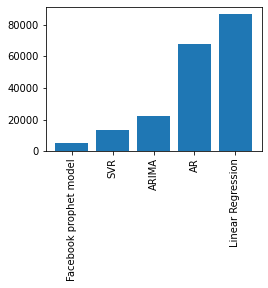

In [238]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
plt.bar(x=Recovered_rms['Model Name'],height=Recovered_rms['Root Mean Squared Error'],width=0.8)
plt.xticks(rotation=90)

## **Functions**

In [0]:
def country_confirmed(dates):
  from datetime import datetime,date
  dates=datetime.strptime(str(dates),'%Y/%m/%d').date()
  delta=dates - date(2020,4,22)
  periods=delta.days
  future = confirm_model_prophet.make_future_dataframe(periods=periods)
  forecast = confirm_model_prophet.predict(future)
  yhat=forecast['yhat'].iloc[-1]
  yhat_lower=forecast['yhat_lower'].iloc[-1]
  yhat_upper=forecast['yhat_upper'].iloc[-1] 
  return yhat,yhat_lower,yhat_upper

In [240]:
country_confirmed('2020/04/26')

(2966409.749353399, 2937617.002743723, 2995341.5933387866)

In [0]:
def country_deaths(dates):
  from datetime import datetime,date
  dates=datetime.strptime(str(dates),'%Y/%m/%d').date()
  delta=dates - date(2020,4,20)
  periods=delta.days
  future = death_model_prophet.make_future_dataframe(periods=periods)
  forecast = death_model_prophet.predict(future)
  yhat=forecast['yhat'].iloc[-1]
  yhat_lower=forecast['yhat_lower'].iloc[-1]
  yhat_upper=forecast['yhat_upper'].iloc[-1] 
  return yhat,yhat_lower,yhat_upper

In [242]:
country_deaths('2020/04/26')

(209228.67565497075, 205232.2656481904, 213039.03906190515)

In [0]:
def country_recovered(dates):
  from datetime import datetime,date
  dates=datetime.strptime(str(dates),'%Y/%m/%d').date()
  delta=dates - date(2020,4,20)
  periods=delta.days
  future = recovered_model_prophet.make_future_dataframe(periods=periods)
  forecast = recovered_model_prophet.predict(future)
  yhat=forecast['yhat'].iloc[-1]
  yhat_lower=forecast['yhat_lower'].iloc[-1]
  yhat_upper=forecast['yhat_upper'].iloc[-1] 
  return yhat,yhat_lower,yhat_upper

In [244]:
country_recovered('2020/04/26')

(780022.938578579, 763579.6585277852, 796544.8107942536)

In [0]:
import pickle

In [0]:
pickle.dump(confirm_model_prophet,open('model_confirmed.pkl','wb'))

In [0]:
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [0]:
pickle.dump(death_model_prophet,open('model_death.pkl','wb'))

In [0]:
pickle.dump(recovered_model_prophet,open('model_recovered.pkl','wb'))